In [11]:
from transformers import AutoTokenizer, AutoModelForCausalLM, GPT2Tokenizer

# tokenizer = AutoTokenizer.from_pretrained("google/gemma-2b")
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")


In [12]:
tokenizer("!")

{'input_ids': [0], 'attention_mask': [1]}

In [13]:
tokenizer.decode([0])

'!'

In [1]:
import torch
import os
import json
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import cycle

In [14]:
layers = list(range(41))
mdoel_name = 'gemma-2-9b'

layers = list(range(17))
model_name = 'gemma-2b'

layers = list(range(11))
model_name = 'gpt2-small'


means = defaultdict(list)
stds = defaultdict(list)


for layer in layers:
    filename =f'../cruft/padmode_{model_name}_blocks.{layer}.hook_resid_pre_corrs.json' 
    if os.path.exists(filename):
        with open(filename) as f:
            corrs = json.load(f)

        for k, token_dict in corrs.items():
            s = torch.stack([torch.tensor(t) for t in token_dict]).mean(dim=0)
            means[k].append(s.mean().item())
            stds[k].append(s.std().item())


# ranks is a new deep copy of means

ranks = {k: [0] * len(layers) for k in means}
for layer in range(len(layers)):
    layer_means = {k: means[k][layer] for k in means}
    # Sort keys by their mean correlation scores
    sorted_keys = sorted(layer_means, key=layer_means.get, reverse=True)
    # Assign rank based on sorted order
    r = {key: rank for rank, key in enumerate(sorted_keys, 1)}

    # Update the means dictionary with ranks
    for k in r:
        ranks[k][layer] = r[k]

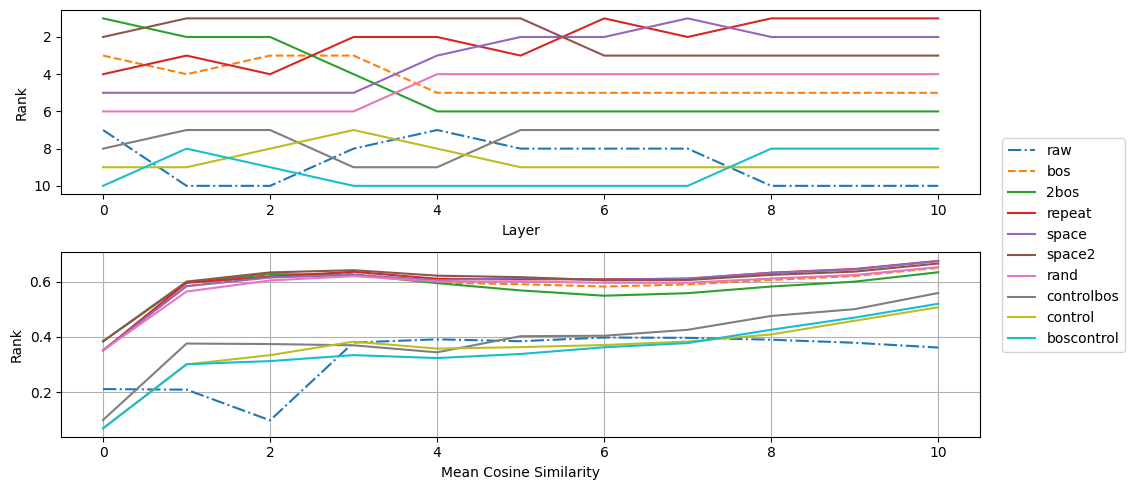

In [15]:
f, ax = plt.subplots(2, 1, figsize=(10, 5))

for k in ranks.keys():
    linestyle = '-'
    if k == 'bos':
        linestyle = '--'
    elif k == 'raw':
        linestyle = '-.'
    
    ax[0].plot(list(range(len(ranks[k]))), ranks[k], label=k, linestyle=linestyle)

# ax[0].gca().invert_yaxis()
ax[0].set_xlabel('Layer')
ax[0].set_ylabel('Rank')

ax[0].invert_yaxis() 

for k in means.keys():
    linestyle = '-'
    if k == 'bos':
        linestyle = '--'
    elif k == 'raw':
        linestyle = '-.'

    ax[1].plot(list(range(len(means[k]))), means[k], linestyle=linestyle)


ax[1].grid()
ax[1].set_xlabel('Mean Cosine Similarity')
ax[1].set_ylabel('Rank')

f.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout() 


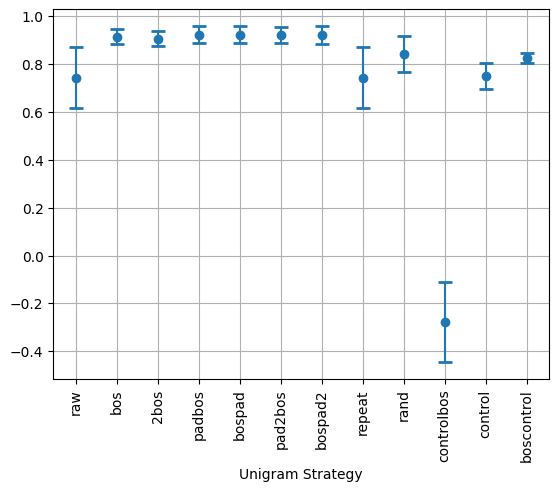

In [11]:
mean_means = {k: torch.tensor(v).mean() for k, v in means.items()}
mean_stds = {k: torch.tensor(v).std() for k, v in means.items()}

plt.errorbar(list(mean_means.keys()), list(mean_means.values()), yerr=list(mean_stds.values()), fmt='o', capsize=5, capthick=2, label=k)
plt.grid()
plt.xlabel('Unigram Strategy')
plt.xticks(rotation=90)
print()

raw torch.Size([20]) tensor(0.5752) tensor(0.1064)
bos torch.Size([20]) tensor(0.9008) tensor(0.0378)
2bos torch.Size([20]) tensor(0.8971) tensor(0.0388)
padbos torch.Size([20]) tensor(0.9015) tensor(0.0364)
bospad torch.Size([20]) tensor(0.8965) tensor(0.0325)
bosrepeat torch.Size([20]) tensor(0.8856) tensor(0.0360)
repeat torch.Size([20]) tensor(0.5752) tensor(0.1064)
repeat3 torch.Size([20]) tensor(0.5752) tensor(0.1064)
repeat6 torch.Size([20]) tensor(0.5752) tensor(0.1064)
space torch.Size([20]) tensor(0.7453) tensor(0.0616)
pad torch.Size([20]) tensor(0.7524) tensor(0.0594)
space2 torch.Size([20]) tensor(0.7542) tensor(0.0593)
rand torch.Size([20]) tensor(0.7243) tensor(0.0676)
controlbos torch.Size([20]) tensor(-0.1420) tensor(0.2691)
control torch.Size([20]) tensor(0.6213) tensor(0.1819)
controlbos1 torch.Size([20]) tensor(-0.1420) tensor(0.2691)
control1 torch.Size([20]) tensor(0.6213) tensor(0.1819)



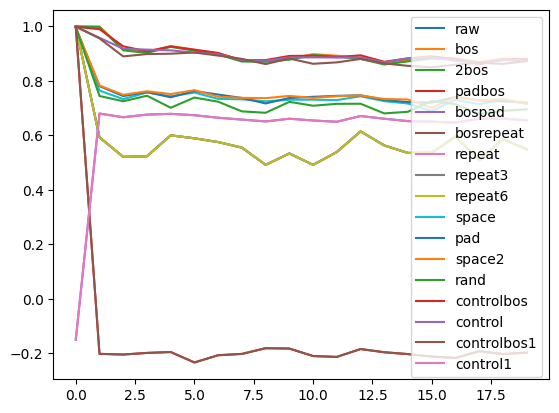

In [66]:
model_name = 'gemma-2b'
filename = f'../cruft/padmode_{model_name}_blocks.16.hook_resid_pre_corrs-1000.json'
with open(filename) as f:
    corrs = json.load(f)

for k, token_dict in corrs.items():
    s = torch.stack([torch.tensor(t) for t in token_dict]).mean(dim=0)[:20]
    print(k, s.shape, s.mean(), s.std())
    plt.plot(s, label=k)

plt.legend()
print()

raw torch.Size([20]) tensor(0.5817) tensor(0.1040)
bos torch.Size([20]) tensor(0.9096) tensor(0.0359)
padbos torch.Size([20]) tensor(0.9100) tensor(0.0357)
pad2bos torch.Size([20]) tensor(0.9092) tensor(0.0357)
bospad2 torch.Size([20]) tensor(0.9013) tensor(0.0334)
controlbos torch.Size([20]) tensor(-0.1406) tensor(0.2687)
control torch.Size([20]) tensor(0.6272) tensor(0.1833)
boscontrol torch.Size([20]) tensor(0.7887) tensor(0.2429)



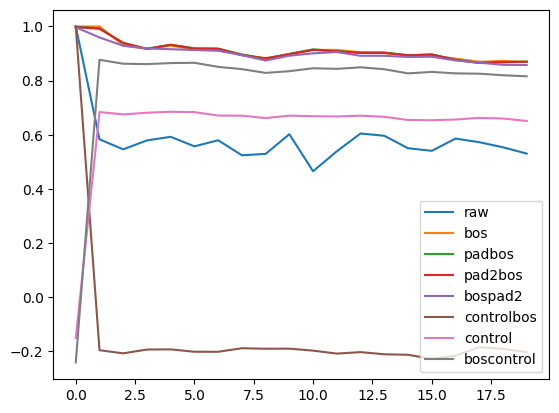

In [77]:
model_name = 'gemma-2b'
filename = f'../cruft/padmode_{model_name}_blocks.16.hook_resid_pre_corrs.json'
with open(filename) as f:
    corrs = json.load(f)

for k, token_dict in corrs.items():
    if k not in ['bos', 'raw', 'bosrepeat', 'padbos', 'control', 'controlbos', 'boscontrol', 'pad2bos', 'bospad2']:
        continue

    # if k != 'raw':
    #     continue
    
    s = torch.stack([torch.tensor(t) for t in token_dict]).mean(dim=0)[:20]
    print(k, s.shape, s.mean(), s.std())
    plt.plot(s, label=k)

plt.legend()
print()

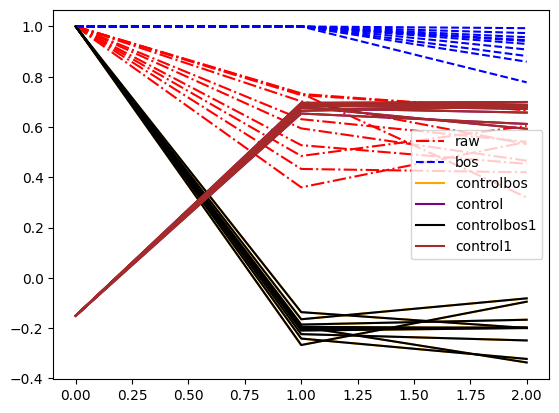

In [58]:
model_name = 'gemma-2b'
filename = f'../cruft/padmode_{model_name}_blocks.16.hook_resid_pre_corrs-1000.json'
with open(filename) as f:
    corrs = json.load(f)

colors = cycle(['red', 'blue', 'green', 'orange', 'purple', 'black', 'brown', 'pink', 'gray', 'cyan'])

for k, token_dict in corrs.items():
    color = next(colors)
    s = torch.stack([torch.tensor(t) for t in token_dict])

    for i in range(10):

        
        linestyle = '-'

        if k == 'bos':
            linestyle = '--'
        elif k == 'raw':
            linestyle = '-.'

        if i == 0:
            label = k
        else:
            label = None

        if k not in ['bos', 'raw', 'control', 'controlbos', 'control1', 'controlbos1']: 
            continue
        plt.plot(s[i, :3], color=color, linestyle=linestyle, label=label)

plt.legend()
print()